In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
 
img = cv.imread('periodic_noise.jpg', cv.IMREAD_GRAYSCALE)

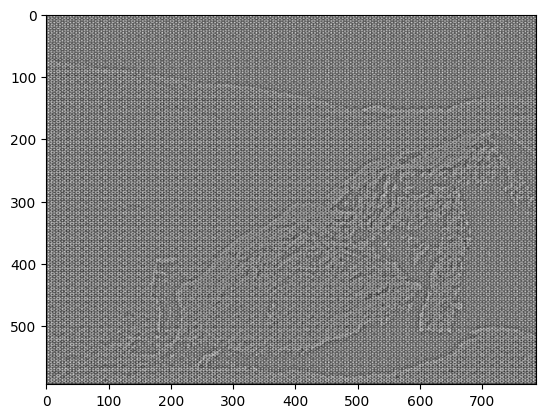

In [2]:
sigma=4.0

kernel_size=None
    
if kernel_size is None:
        kernel_size = int(6 * sigma) + 1
        if kernel_size % 2 == 0:
            kernel_size += 1
    
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gaussian_kernel_2d = gaussian_kernel * gaussian_kernel.T
    
low_pass = cv.filter2D(img, -1, gaussian_kernel_2d)
    
high_pass = img.astype(np.float32) - low_pass.astype(np.float32)
    
high_pass_normalized = cv.normalize(high_pass, None, 0, 255, cv.NORM_MINMAX)
high_pass_uint8 = np.uint8(high_pass_normalized)

plt.imshow(high_pass_uint8, cmap='gray')

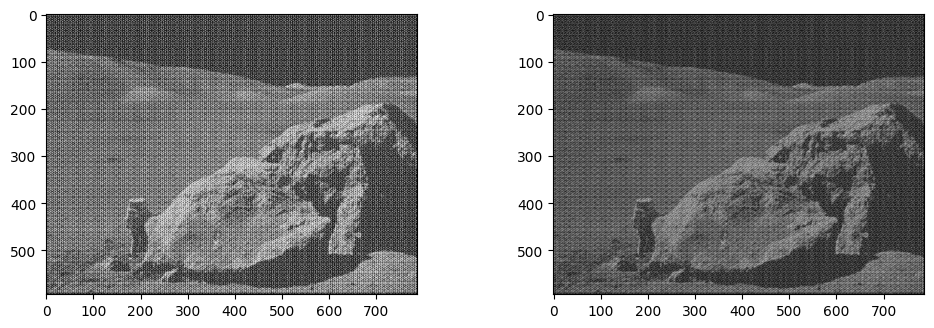

In [5]:
dft = cv.dft(np.float32(img), flags=cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

filter_radius=5

rows, cols = img.shape
mask = np.ones((rows, cols, 2), np.uint8)
center_row, center_col = rows // 2, cols // 2
    
magnitude = cv.magnitude(dft_shift[:,:,0], dft_shift[:,:,1])
magnitude[center_row-10:center_row+10, center_col-10:center_col+10] = 0
    
for _ in range(4):
    max_val = np.max(magnitude)
    if max_val > np.mean(magnitude) * 2:
        max_pos = np.where(magnitude == max_val)
        u, v = max_pos[0][0], max_pos[1][0]
        cv.circle(mask, (v, u), filter_radius, (0, 0), -1)
        magnitude[u-10:u+10, v-10:v+10] = 0

filtered_dft = dft_shift * mask
dft_ishift = np.fft.ifftshift(filtered_dft)
img_back = cv.idft(dft_ishift)
img_back = cv.magnitude(img_back[:,:,0], img_back[:,:,1])
    
filtered1 = cv.normalize(img_back, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)
    
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')

plt.subplot(2, 2, 2)
plt.imshow(filtered1, cmap='gray')
